In [1040]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1041]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1042]:
# Set Pandas options for better display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth', 200)

In [1043]:
# Data 
data_train = pd.read_csv('train.csv',encoding='utf-8')

In [1044]:
# Data Dictionary
dictionary = pd.read_excel('Dictionary.xlsx')

In [1045]:
dictionary

,Variable,Definition,Key
0,survival,Survival,"0 = No, 1 = Yes"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,NaN
3,Age,Age in years,NaN
4,sibsp,# of siblings / spouses aboard the Titanic,NaN
5,parch,# of parents / children aboard the Titanic,NaN
6,ticket,Ticket number,NaN
7,fare,Passenger fare,NaN
8,cabin,Cabin number,NaN
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


In [1046]:
data_train.shape

(891, 12)

In [1047]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1048]:
# Use describe() function alongwith percentiles parameter to get a spread of the data in the numeric columns
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1049]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [1050]:
# Function to display null percentages in descending order
def null_summary(data):
    df = pd.DataFrame([data.isnull().sum(),
              round(100*(data.isnull().sum()/len(data.index)), 2)]
            ).T.rename(columns={0:'Null Count',1:'Null Percentage'}).\
sort_values(by='Null Percentage',ascending=False)
    return df

In [1051]:
null_summary(data_train)

,Null Count,Null Percentage
Cabin,687.0,77.10
Age,177.0,19.87
Embarked,2.0,0.22
PassengerId,0.0,0.00
Survived,0.0,0.00
Pclass,0.0,0.00
Name,0.0,0.00
Sex,0.0,0.00
SibSp,0.0,0.00
Parch,0.0,0.00


In [1052]:
# Check Survival Rate
data_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

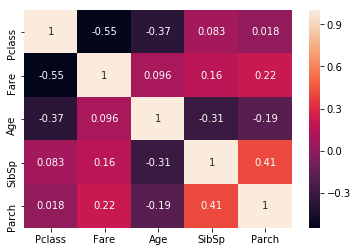

In [1053]:
sns.heatmap(data_train[['Pclass','Fare','Age','SibSp','Parch']].corr(),annot=True)

In [1054]:
data_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [1055]:
data_train['Sex'] = data_train['Sex'].map({'male': 1, 'female': 0})

In [1056]:
data_train.Name = data_train.Name.str.extract(r',\s*([^\.]*)\s*\.', expand=False)

In [1057]:
data_train.rename(columns={'Name' : 'Title'},inplace=True)

In [1058]:
data_train.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


In [1059]:
data_train.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Lady              1
the Countess      1
Mme               1
Jonkheer          1
Don               1
Ms                1
Sir               1
Capt              1
Name: Title, dtype: int64

In [1060]:
dict(data_train.groupby('Title')['Age'].mean().astype('int'))

{'Capt': 70,
 'Col': 58,
 'Don': 40,
 'Dr': 42,
 'Jonkheer': 38,
 'Lady': 48,
 'Major': 48,
 'Master': 4,
 'Miss': 21,
 'Mlle': 24,
 'Mme': 24,
 'Mr': 32,
 'Mrs': 35,
 'Ms': 28,
 'Rev': 43,
 'Sir': 49,
 'the Countess': 33}

In [1061]:
data_train[data_train.Age.isna()]

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,Mr,1,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,Mr,1,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,Mrs,0,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,Mr,1,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,Miss,0,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,Mr,1,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,Mrs,0,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,Miss,0,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,Mr,1,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,Mr,1,NaN,0,0,349253,7.8958,NaN,C


In [1062]:
data_train["Age"] = (data_train["Age"].fillna(data_train.groupby("Title")["Age"].transform("mean").astype('int')))

In [1063]:
data_train.loc[5,]

PassengerId         6
Survived            0
Pclass              3
Title              Mr
Sex                 1
Age                32
SibSp               0
Parch               0
Ticket         330877
Fare           8.4583
Cabin             NaN
Embarked            Q
Name: 5, dtype: object

In [1064]:
null_summary(data_train)

,Null Count,Null Percentage
Cabin,687.0,77.10
Embarked,2.0,0.22
PassengerId,0.0,0.00
Survived,0.0,0.00
Pclass,0.0,0.00
Title,0.0,0.00
Sex,0.0,0.00
Age,0.0,0.00
SibSp,0.0,0.00
Parch,0.0,0.00


In [1065]:
data_train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [1066]:
data_train.Embarked.fillna('S',inplace=True)

In [1067]:
null_summary(data_train)

,Null Count,Null Percentage
Cabin,687.0,77.1
PassengerId,0.0,0.0
Survived,0.0,0.0
Pclass,0.0,0.0
Title,0.0,0.0
Sex,0.0,0.0
Age,0.0,0.0
SibSp,0.0,0.0
Parch,0.0,0.0
Ticket,0.0,0.0


In [1068]:
data_train_final = data_train.copy(deep=True)

In [1069]:
data_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Title          891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


In [1070]:
data_train_final.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


In [1071]:
#data_train_final = pd.get_dummies(data_train_final,columns=['Pclass','Title','Embarked'],drop_first=True)

In [1072]:
#data_train_final.head()

In [1073]:
#drop_cols = ['PassengerId','Ticket','Cabin']
drop_cols = ['PassengerId','Title','Ticket','Cabin','Embarked']

In [1074]:
data_train_final.drop(columns=drop_cols,inplace=True,axis=1)

In [1075]:
data_train_final.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [1076]:
data_train_final.shape

(891, 7)

In [1077]:
#from sklearn.model_selection import train_test_split

In [1078]:
# Putting feature variables to X
X_train = data_train_final.drop(['Survived'],axis=1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [1079]:
# Putting response variable 'converted' to y
y_train = data_train_final['Survived']

y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [1080]:
num_vars = ['Age','Fare']

In [1081]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,-0.576496,1,0,-0.502445
1,1,0,0.628536,1,0,0.786845
2,3,0,-0.275238,0,0,-0.488854
3,1,0,0.402593,1,0,0.420730
4,3,1,0.402593,0,0,-0.486337


In [1082]:
import statsmodels.api as sm

# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()
#logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -391.85
Date:                Tue, 05 Mar 2019   Deviance:                       783.71
Time:                        01:28:53   Pearson chi2:                     909.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9468      0.374     10.546      0.000       3.213       4.680
Pclass        -1.1270      0.141     -7.971      0.000      -1.404      -0.850
Sex           -2.7241      0.199    -13.705      0.000      -3.114      -2.335
Age           -0.5741      0.104     -5.523      0.000      -0.778      -0.370
SibSp         -0.3737      0.109     -3.420      0.001      -0.588      -0.160
Parch         -0.1058      0.118     -0.896      0.370      -0.337       0.126
Fare           0.1368      0.117      1.166      0.244      -0.093       0.367
==============================================================================
"""

In [1083]:
# Getting the predicted values on the train set
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

0    0.093663
1    0.899611
2    0.658579
3    0.906577
4    0.079007
5    0.089067
6    0.288474
7    0.097965
8    0.601311
9    0.879757
dtype: float64

In [1084]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09366288, 0.89961145, 0.65857932, 0.90657664, 0.07900671,
       0.08906715, 0.28847388, 0.0979651 , 0.60131149, 0.87975695])

In [1085]:
y_train_pred_final = pd.DataFrame({'Survived':y_train.values, 
                                   'Survival_Prob':y_train_pred})
y_train_pred_final['PassengerId'] = y_train.index+1
y_train_pred_final.head()

,Survived,Survival_Prob,PassengerId
0,0,0.093663,1
1,1,0.899611,2
2,1,0.658579,3
3,1,0.906577,4
4,0,0.079007,5


In [1086]:
y_train_pred_final['predicted'] = y_train_pred_final.Survival_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Survived,Survival_Prob,PassengerId,predicted
0,0,0.093663,1,0
1,1,0.899611,2,1
2,1,0.658579,3,1
3,1,0.906577,4,1
4,0,0.079007,5,0


In [1087]:
from sklearn import metrics

In [1088]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
print(confusion)

[[475  74]
 [106 236]]


In [1089]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.predicted))

0.797979797979798


In [1090]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1091]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Pclass,3.60
1,Sex,2.88
4,Parch,1.60
3,SibSp,1.58
5,Fare,1.20
2,Age,1.15


In [1092]:
col = X_train.columns

In [1093]:
# Very high p-value on Parch, so we drop and rebuild the model again

col = col.drop('Parch', 1)
col

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare'], dtype='object')

In [1094]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.26
Date:                Tue, 05 Mar 2019   Deviance:                       784.52
Time:                        01:28:54   Pearson chi2:                     918.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9269      0.373     10.540      0.000       3.197       4.657
Pclass        -1.1412      0.140     -8.139      0.000      -1.416      -0.866
Sex           -2.6906      0.195    -13.830      0.000      -3.072      -2.309
Age           -0.5713      0.104     -5.507      0.000      -0.775      -0.368
SibSp         -0.4000      0.106     -3.778      0.000      -0.607      -0.192
Fare           0.1146      0.112      1.022      0.307      -0.105       0.334
==============================================================================
"""

In [1095]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Pclass,3.23
1,Sex,2.80
3,SibSp,1.39
2,Age,1.15
4,Fare,1.13


In [1096]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [1097]:
y_train_pred[:10]

array([0.08985536, 0.89253035, 0.64672201, 0.90060696, 0.07777969,
       0.08763271, 0.2876154 , 0.09770668, 0.63854082, 0.87138098])

In [1098]:
y_train_pred_final['predicted'] = y_train_pred_final.Survival_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Survived,Survival_Prob,PassengerId,predicted
0,0,0.093663,1,0
1,1,0.899611,2,1
2,1,0.658579,3,1
3,1,0.906577,4,1
4,0,0.079007,5,0


In [1099]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
print(confusion)

[[475  74]
 [106 236]]


In [1100]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.predicted))

0.797979797979798


In [1101]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1102]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6900584795321637

In [1103]:
# Let us calculate specificity
TN / float(TN+FP)

0.8652094717668488

In [1104]:
# Calculate false postive rate - predicting converted when lead has not converted
print(FP/ float(TN+FP))

0.13479052823315119


In [1105]:
# positive predictive value 
print (TP / float(TP+FP))

0.7612903225806451


In [1106]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8175559380378657


In [1107]:
# Very high p-value on Parch, so we drop and rebuild the model again

col = col.drop('Fare', 1)
col

Index(['Pclass', 'Sex', 'Age', 'SibSp'], dtype='object')

In [1108]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.82
Date:                Tue, 05 Mar 2019   Deviance:                       785.65
Time:                        01:28:56   Pearson chi2:                     918.
No. Iterations:                     5   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0841      0.341     11.967      0.000       3.415       4.753
Pclass        -1.2137      0.122     -9.944      0.000      -1.453      -0.974
Sex           -2.7037      0.194    -13.928      0.000      -3.084      -2.323
Age           -0.5767      0.104     -5.571      0.000      -0.780      -0.374
SibSp         -0.3799      0.104     -3.663      0.000      -0.583      -0.177
==============================================================================
"""

In [1109]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Pclass,3.07
1,Sex,2.79
3,SibSp,1.29
2,Age,1.13


In [1110]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [1111]:
y_train_pred[:10]

array([0.09046256, 0.89360449, 0.64608907, 0.90537275, 0.07636904,
       0.08608252, 0.29097366, 0.09982841, 0.63609575, 0.87619187])

In [1112]:
y_train_pred_final['predicted'] = y_train_pred_final.Survival_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Survived,Survival_Prob,PassengerId,predicted
0,0,0.093663,1,0
1,1,0.899611,2,1
2,1,0.658579,3,1
3,1,0.906577,4,1
4,0,0.079007,5,0


In [1113]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
print(confusion)

[[475  74]
 [106 236]]


In [1114]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.predicted))

0.797979797979798


In [1115]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1116]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6900584795321637

In [1117]:
# Let us calculate specificity
TN / float(TN+FP)

0.8652094717668488

In [1118]:
# Calculate false postive rate - predicting converted when lead has not converted
print(FP/ float(TN+FP))

0.13479052823315119


In [1119]:
# positive predictive value 
print (TP / float(TP+FP))

0.7612903225806451


In [1120]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8175559380378657


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1121]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(9,6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1122]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Survived, 
                                         y_train_pred_final.Survival_Prob, 
                                         drop_intermediate = False )

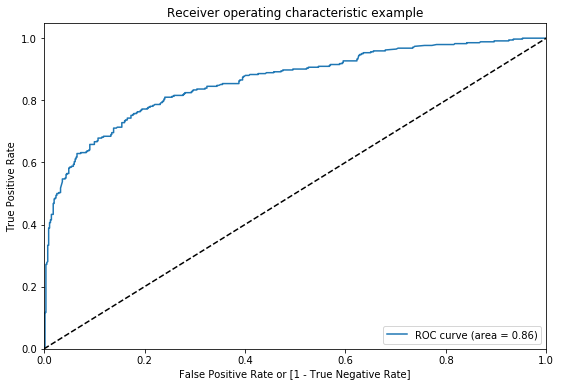

In [1123]:
draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survival_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1124]:
# Let's create columns with different probability cutoffs 
#numbers = [float(x)/20 for x in range(20)]
#for i in numbers:
for i in np.around(np.arange(0.05,1,0.05),decimals=2):
    y_train_pred_final[i]= y_train_pred_final.Survival_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survived,Survival_Prob,PassengerId,predicted,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.093663,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.899611,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
2,1,0.658579,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
3,1,0.906577,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
4,0,0.079007,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1125]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

#num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
num = np.around(np.arange(0.05,1,0.05),decimals=2)
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.05  0.05  0.417508  0.997076  0.056466
0.10  0.10  0.591470  0.947368  0.369763
0.15  0.15  0.690236  0.885965  0.568306
0.20  0.20  0.718294  0.853801  0.633880
0.25  0.25  0.747475  0.836257  0.692168
0.30  0.30  0.769921  0.812865  0.743169
0.35  0.35  0.776655  0.786550  0.770492
0.40  0.40  0.791246  0.771930  0.803279
0.45  0.45  0.797980  0.751462  0.826958
0.50  0.50  0.797980  0.690058  0.865209
0.55  0.55  0.808081  0.669591  0.894353
0.60  0.60  0.806958  0.643275  0.908925
0.65  0.65  0.808081  0.596491  0.939891
0.70  0.70  0.801347  0.546784  0.959927
0.75  0.75  0.780022  0.456140  0.981785
0.80  0.80  0.758698  0.388889  0.989071
0.85  0.85  0.723906  0.292398  0.992714
0.90  0.90  0.693603  0.207602  0.996357
0.95  0.95  0.648709  0.087719  0.998179


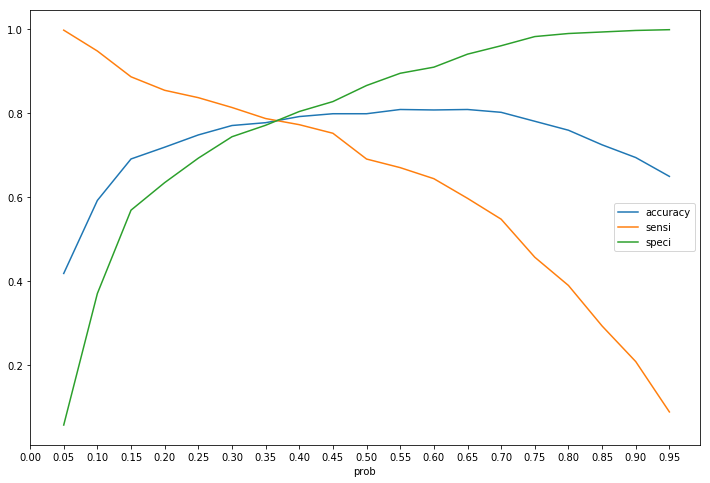

In [1126]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(12,8))
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

### Precision and recall tradeoff

In [1127]:
from sklearn.metrics import precision_recall_curve

In [1128]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Survived, y_train_pred_final.Survival_Prob)

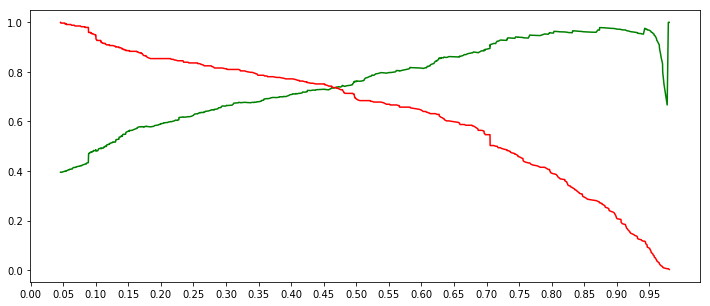

In [1129]:
plt.figure(figsize=(12,5))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

In [1130]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Survival_Prob.map( lambda x: 1 if x > 0.5875 else 0)

y_train_pred_final.head()

,Survived,Survival_Prob,PassengerId,predicted,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
0,0,0.093663,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.899611,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.658579,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1
3,1,0.906577,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.079007,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1131]:
y_train_pred_final.groupby('Survived')['Survival_Prob'].min()

Survived
0    0.004689
1    0.046014
Name: Survival_Prob, dtype: float64

In [1132]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.8103254769921436

In [1133]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.final_predicted )
confusion2

array([[499,  50],
       [119, 223]], dtype=int64)

In [1134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.652046783625731

In [1136]:
# Let us calculate specificity
TN / float(TN+FP)

0.9089253187613844

In [1137]:
# Calculate false postive rate - predicting converted when lead has not converted
print(FP/ float(TN+FP))

0.09107468123861566


In [1138]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8168498168498168


In [1139]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8074433656957929


## Accuracy , Precision and Recall

In [1140]:
# Accuracy.
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.8103254769921436

In [1141]:
# Precision 
TP / (TP + FP)

0.8168498168498168

In [1142]:
# Recall 
TP / (TP + FN)

0.652046783625731

### Making predictions on the test set

In [1143]:
data_test = pd.read_csv('test.csv',encoding='utf-8')

In [1144]:
data_test.shape

(418, 12)

In [1145]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [1146]:
null_summary(data_test)

,Null Count,Null Percentage
Cabin,327.0,78.23
Age,86.0,20.57
Fare,1.0,0.24
PassengerId,0.0,0.00
Pclass,0.0,0.00
Name,0.0,0.00
Sex,0.0,0.00
SibSp,0.0,0.00
Parch,0.0,0.00
Ticket,0.0,0.00


In [1147]:
# Do all the things done on train set

In [1148]:
data_test['Sex'] = data_test['Sex'].map({'male': 1, 'female': 0})

In [1149]:
data_test.Name = data_test.Name.str.extract(r',\s*([^\.]*)\s*\.', expand=False)

In [1150]:
data_test.rename(columns={'Name' : 'Title'},inplace=True)

In [1151]:
data_test.head()

,PassengerId,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,Mr,1,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,Mrs,0,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,Mr,1,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,Mr,1,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,Mrs,0,22.0,1,1,3101298,12.2875,NaN,S,0


In [1152]:
data_test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [1153]:
null_summary(data_test)

,Null Count,Null Percentage
Cabin,327.0,78.23
Age,86.0,20.57
Fare,1.0,0.24
PassengerId,0.0,0.00
Pclass,0.0,0.00
Title,0.0,0.00
Sex,0.0,0.00
SibSp,0.0,0.00
Parch,0.0,0.00
Ticket,0.0,0.00


In [1154]:
data_test.groupby('Title')['Age'].mean()

Title
Col       50.000000
Dona      39.000000
Dr        53.000000
Master     7.406471
Miss      21.774844
Mr        32.000000
Mrs       38.903226
Ms              NaN
Rev       35.500000
Name: Age, dtype: float64

In [1155]:
data_test = data_test.set_value(88,'Age',21)

In [1156]:
data_test.groupby('Title')['Age'].mean().astype('int')

Title
Col       50
Dona      39
Dr        53
Master     7
Miss      21
Mr        32
Mrs       38
Ms        21
Rev       35
Name: Age, dtype: int32

In [1157]:
data_test[data_test.Age.isna()].head()

,PassengerId,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
10,902,3,Mr,1,NaN,0,0,349220,7.8958,NaN,S,0
22,914,1,Mrs,0,NaN,0,0,PC 17598,31.6833,NaN,S,1
29,921,3,Mr,1,NaN,2,0,2662,21.6792,NaN,C,0
33,925,3,Mrs,0,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
36,928,3,Miss,0,NaN,0,0,342712,8.0500,NaN,S,1


In [1158]:
data_test["Age"] = (data_test["Age"].fillna(data_test.groupby("Title")["Age"].transform("mean").astype('int')))

In [1159]:
data_test.loc[10]

PassengerId       902
Pclass              3
Title              Mr
Sex                 1
Age                32
SibSp               0
Parch               0
Ticket         349220
Fare           7.8958
Cabin             NaN
Embarked            S
Survived            0
Name: 10, dtype: object

In [1160]:
null_summary(data_test)

,Null Count,Null Percentage
Cabin,327.0,78.23
Fare,1.0,0.24
PassengerId,0.0,0.00
Pclass,0.0,0.00
Title,0.0,0.00
Sex,0.0,0.00
Age,0.0,0.00
SibSp,0.0,0.00
Parch,0.0,0.00
Ticket,0.0,0.00


In [1161]:
data_test.Fare.value_counts(dropna=False)

 7.7500      21
 26.0000     19
 8.0500      17
 13.0000     17
 7.8958      11
 10.5000     11
 7.7750      10
 7.2292       9
 7.2250       9
 7.8542       8
 8.6625       8
 21.0000      8
 26.5500      7
 7.8792       6
 27.7208      6
 262.3750     5
 7.2500       5
 7.9250       5
 211.5000     4
 69.5500      4
 7.7958       4
 7.5500       4
 14.5000      4
 15.2458      4
 31.3875      3
 134.5000     3
 14.4542      3
 55.4417      3
 13.7750      3
 221.7792     3
 83.1583      3
 59.4000      3
 7.7333       3
 13.5000      3
 39.0000      3
 9.5000       3
 23.0000      3
 31.5000      3
 65.0000      3
 16.1000      3
 57.7500      2
 7.0500       2
 164.8667     2
 75.2417      2
 46.9000      2
 263.0000     2
 29.7000      2
 60.0000      2
 93.5000      2
 6.4375       2
 13.9000      2
 11.5000      2
 36.7500      2
 32.5000      2
 15.5000      2
 151.5500     2
 12.1833      2
 73.5000      2
 0.0000       2
 20.5750      2
 7.0000       2
 13.8583      2
 15.0458

In [1162]:
data_test.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [1163]:
data_test.Fare.mode()[0]

7.75

In [1164]:
data_test.Fare.fillna(data_test.Fare.mode()[0],inplace=True)

In [1165]:
null_summary(data_test)

,Null Count,Null Percentage
Cabin,327.0,78.23
PassengerId,0.0,0.00
Pclass,0.0,0.00
Title,0.0,0.00
Sex,0.0,0.00
Age,0.0,0.00
SibSp,0.0,0.00
Parch,0.0,0.00
Ticket,0.0,0.00
Fare,0.0,0.00


In [1166]:
data_test_final = data_test.copy(deep=True)

In [1167]:
data_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Title          418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


In [1168]:
data_test_final.head()

,PassengerId,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,Mr,1,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,Mrs,0,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,Mr,1,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,Mr,1,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,Mrs,0,22.0,1,1,3101298,12.2875,NaN,S,0


In [1169]:
#data_train_final = pd.get_dummies(data_train_final,columns=['Pclass','Title','Embarked'],drop_first=True)

In [1170]:
#data_train_final.head()

In [1171]:
#drop_cols = ['PassengerId','Ticket','Cabin']
drop_cols = ['PassengerId','Title','Ticket','Cabin','Embarked']

In [1172]:
data_test_final.drop(columns=drop_cols,inplace=True,axis=1)

In [1173]:
data_test_final.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,34.5,0,0,7.8292,0
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,0
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [1174]:
data_test_final.shape

(418, 7)

In [1175]:
data_test_final.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,34.5,0,0,7.8292,0
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,0
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [1176]:
# Putting feature variables to X
X_test = data_test_final.copy(deep=True)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,1,34.5,0,0,7.8292,0
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,0
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [1177]:
num_vars

['Age', 'Fare']

In [1178]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [1179]:
X_test = X_test[col]
X_test.head()

,Pclass,Sex,Age,SibSp
0,3,1,0.364935,0
1,3,0,1.306367,1
2,2,1,2.436084,0
3,3,1,-0.199923,0
4,3,0,-0.576496,1


In [1180]:
X_test_sm = sm.add_constant(X_test)

In [1181]:
y_test_pred = res.predict(X_test_sm)

In [1182]:
y_test_pred[:10]

0    0.077915
1    0.334006
2    0.079308
3    0.104775
4    0.597660
5    0.170707
6    0.605433
7    0.219587
8    0.720987
9    0.066331
dtype: float64

In [1183]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1184]:
# Let's see the head
y_pred_1.head()

,0
0,0.077915
1,0.334006
2,0.079308
3,0.104775
4,0.597660


In [1185]:
data_test.head()

,PassengerId,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,Mr,1,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,Mrs,0,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,Mr,1,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,Mr,1,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,Mrs,0,22.0,1,1,3101298,12.2875,NaN,S,0


In [1186]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(data_test.PassengerId)

In [1187]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1188]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1 ],axis=1)

In [1189]:
y_pred_final.head()

,PassengerId,0
0,892,0.077915
1,893,0.334006
2,894,0.079308
3,895,0.104775
4,896,0.597660


In [1190]:
y_pred_final.columns = [ 'PassengerId' , 'Survival_Prob']

In [1191]:
# Let's see the head of y_pred_final
y_pred_final.head()

,PassengerId,Survival_Prob
0,892,0.077915
1,893,0.334006
2,894,0.079308
3,895,0.104775
4,896,0.597660


In [1202]:
#precision - recall
y_pred_final['Survived'] = y_pred_final.Survival_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [1203]:
y_pred_final.head()

,PassengerId,Survival_Prob,Survived
0,892,0.077915,0
1,893,0.334006,1
2,894,0.079308,0
3,895,0.104775,0
4,896,0.597660,1


In [1204]:
submission = y_pred_final[['PassengerId','Survived']]

In [1205]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1206]:
submission.to_csv('submission.csv',index=False)

In [1197]:
#confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
#confusion2

In [1198]:
#TP = confusion2[1,1] # true positive 
#TN = confusion2[0,0] # true negatives
#FP = confusion2[0,1] # false positives
#FN = confusion2[1,0] # false negatives

### Test - Accuracy, Precision and Recall

In [1199]:
# Accuracy.
#metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

In [1200]:
# Precision
#TP / float(TP+FP)

In [1201]:
# Recall
#TP / float(TP+FN)